# Nutrition and Sustainability: exploring the relationship between nutritional value and ecological impact of food products.

## 1. Research questions, objectives and source of data 

### 1.1 Introduction 

„Open Food Facts“ is a crowdsourced food products database[1]. The database contains information about products from all over the world. The information available includes EAN-Barcode numbers, nutritional information, ingredients and information about the ecological impact of a product. 

The database also provides the "Nutri-Score“ and "Eco-Score“. 
The „Nutri-Score“ is a five-colour nutrition label and nutritional rating system[2]. The „Eco-Score“ is also a five-colour rating system. But its purpose is to aid consumers in making ecological food purchasing choices[3]. Both use a rating system form A (good) to E (bad). 

Upon examining the database for another project I have noticed that products with a bad „Eco-Score“ often have a bad „Nurti-Score“ the same can be observed for products with good scores. 

In this project I would like to explore if there is indeed a correlation between both rating systems and to find a possible causation of such a possible correlation.  

### 1.2 Research questions / objectives 

The primary aims of this project are to investigate the following research questions:

- **Is there a correlation between Nutri Score and Eco Score?**
- **If so is there a causation identifiable?**
- **Are there any specific ingredients that cause bad Nutri-Scores and Eco-Scores?**

To achieve this aim, I will:

- Collect data on on both Nutri-Score and Eco-Score of a sample of products, by scraping product information via the Open Food Facts API 
- Create subdata sets
- Analyze the data using statistical techniques to determine the strength and direction of a possible correlation between the Eco-Score and Nutri-Score
- Analyse products meta data: ingredients, supply chain, category 
- Interpret the results of the analysis and discuss their implications
- Explore a possible causations if a correlation is found  
- Present the findings in a clear and concise manner, including any limitations of the study.


### 1.3 Data

#### 1.3.1 Origin of data 

The data used in this product originates from the „Open Food Facts“ database and is attained by calling the „Open Food Facts“ API for every product. Before calling the API, I am scraping the first three pages of the website to receive a list of url within all „a“ classes that contain the substring „/product“. 


#### 1.3.2 Why is it appropriate 

Nutri-Score has become an established measurement of nutritional value for food items. The Eco-Score follows the same pattern of scale, therefore this measurement can be easily understood and is directly comparable. 


#### 1.3.3 Considerations of other data sets

I have also considered the following two data bases:

- https://doc.agribalyse.fr/documentation-en/agribalyse-data/data-accessIssue 
    The issue here was that it only contains information regarding ecological aspects. The "nutri-score" would then have to be sourced elsewhere. 
 
- coop.ch 
    This is the second largest retailer in Switzerland. Like it is the case in the source above products on the website often only contain information about the "eco-score".

Since „Open Food Facts“ database contains both information and additional information, and is accessible via an API I have chosen it as the source. 


### 1.4 Ethics and limitations

It is important to ensure that the data being used is accurate and complete. Open Food Facts is an open source database and maintained by a community of users and volunteer developers, so there is a possibility that some entries are not complete or faulty. I must ensure the accuracy of the data and consider biases and limitations of the data. Other limitations include:
- Granularity: Granularity can vary from product to product. Product A could contain more information about its ingredients than product B. 
- Availability: Since the data is web scraped, the data may vary from region to region.

I must also ensure that none of the data contains any personal identifiers of private individuals or other sensitive personal information.



## 2. Libraries 
The following libraries are needed for this project. 

In [1]:
#import libararies 
import requests 
import json
from bs4 import BeautifulSoup
import pandas as pd
import re 
import numpy as np

import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#correlation calculation 
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import spearmanr


## 3. Webscraping  

### 3.1 API Calls

The data for this project is attained via the „Open Food Fact“ database. This is done by making a call to their API for each product.

The product urls are web scraped from „openfoodfacts.org" and stored in a list.

The function below iterates over the list to make each API call. If the API call was successful, the function tries to create new variables and assigns them information from the „Open Food Fact“ database. The information we request and store are: product name, category, ingredients, supply chain countries, nutri-score, eco-score, nutri-score numerical, eco-score numerical. We also calculate the distance from the nutri-score to eco-score. This is done by using the ord() function to get the integer value of the Unicode characters and then by calculation the distance using math.dist(). 

If the API request could not return values on the desired information, the function throws an exception and assigns „N/A“ to the variable. 

The variables  for each product are then stored in the list „product“.

The function then returns a pandas data frame. 


In [2]:
def getDataFrame(links):
    products = []

    #iterate over plantbased
    for product in links:
        # Construct the API request URL
        # https://openfoodfacts.github.io/api-documentation-staging/
        # https://www.nylas.com/blog/use-python-requests-module-rest-apis/
        api_url = f"https://world.openfoodfacts.org/api/v0/{product}.json"

        response = requests.get(api_url)
        data = response.json()

        #add score and not only grade
        try:
            product_name = data['product']['product_name']
        except:
             product_name = "N/A"
        try:
            product_category = data['product']['categories']
        except:
            product_category = "N/A"
        try:
            product_manufacturer = data['product']['brands']
        except:
            product_manufacturer = "N/A"
        try:
            product_countries = data['product']['countries']
        except:
            product_countries = "N/A"
        try:
            product_nutriscore = data['product']['nutriscore_grade']
        except:
            product_nutriscore = "N/A"
        try:
            product_ecoscore = data['product']['ecoscore_grade']
        except:
            product_ecoscore = "N/A"
        try:
            product_nutriscoreScore = data['product']['nutriscore_score']
        except:
            product_nutriscoreScore = "N/A"
        try:
            product_ecoscoreScore = data['product']['ecoscore_score']
        except:
            product_ecoscoreScore = "N/A"
        try:
            product_ingredients = data['product']['ingredients_text']
        except:
            product_ingredients = "N/A"

            
        try:
            eco = [ord(product_ecoscore)]
            nutri = [ord(product_nutriscore)]
        except:
            eco = "N/A"
            nutri =  "N/A"           

        #find sources
        try:
            products.append({
                "name": product_name,
                "category": product_category,
                "ingredients": product_ingredients,
                "manufacturer": product_manufacturer,
                "countries": product_countries,
                "nutri-score" : product_nutriscore,
                "eco-score": product_ecoscore,
                "nutri-score score" : product_nutriscoreScore,
                "eco-score score": product_ecoscoreScore,
                "distance": math.dist(eco, nutri),
            })
        except:
            products.append({
                "name": "" ,
                "category": "",
                "ingredients":"" ,
                "manufacturer":"" ,
                "countries":"",
                "nutri-score" : "",
                "eco-score":"" ,
                "nutri-score score" :"" ,
                "eco-score score": "",
                "distance": ""
            })
            

    df = pd.DataFrame(products)
    print(type(products))
    return df

### 3.2 Web scraper

The web scraping functions task is it to scrap an website for all instances within the „a“ classes containing product urls and to store those in a list. Those product urls can then be used to make to API calls. 

This function calls the getDataFrame(links) function once all urls are scrapped from the web page. 

The function takes an URL as an argument. 

In [3]:
def webScraper(sourceUrl):
    #get barcodes from open source food facts 
    url = sourceUrl

    response = requests.get(url)

    if response.status_code != 200:
        print("Error: Could not retrieve HTML/Page") #error message
    else:
        html = response.text

    soup = BeautifulSoup(html, "html.parser")

    #https://docs.python.org/3/library/
    #https://www.appsloveworld.com/pandas/100/435/how-to-extract-urls-from-many-lines-in-a-pandas-dataframe-in-python
    data = soup.find_all("a", href=re.compile("/product"))

    links = []
    for link in data:
        links.append(link['href'])
    
    return getDataFrame(links)

### 3.3 Scraping

Here we call the webSrcaper() function with the first three pages of openfoodfacts.org. 
We use three pages to make sure that our sample is large enough after the data clean up process. 

In [4]:
#scraping page one
dfPage1 = webScraper("https://openfoodfacts.org/")
dfPage1

<class 'list'>


,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
0,,,,,,,,,,
1,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26,35,1.0
2,,,,,,,,,,
3,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15,26,0.0
4,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
96,,,,,,,,,,
97,Ice Tea Saveur Peche,"Plant-based foods and beverages, Beverages, Pl...","water, sugar, fructose, acidity regulators (ci...",Lipton,France,d,c,6,53,1.0
98,Thé - Biscuits,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de _blé_ 67 %,sucre, huile de palme, si...",Lu thé,"France,Suisse, en:reunion, en:new-caledonia",d,d,16,39,0.0
99,Goûter pépites de chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de blé 58,5%, sucre de canne roux, pépi...",Gerblé,"Belgium,France,French Polynesia,Réunion,Switze...",c,c,8,41,0.0


In [5]:
#scraping page two
dfPage2 = webScraper("https://openfoodfacts.org/2")
dfPage2

<class 'list'>


,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
0,,,,,,,,,,
1,Biscuits Pavot Citron,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de blé 58%, huile de colza, sucre de ca...",Gerblé,"France,La Réunion,Suisse",b,b,0,62,0.0
2,Figolu,"Snacks,Zoete snacks,Diepvriesproducten,Koekjes...","wheat flour 34%, fig paste 26%, sugar, palm oi...",LU,"Frankrijk,Guadeloupe",d,c,15,43,1.0
3,Harrys pain de mie extra moelleux nature sans ...,"Aliments et boissons à base de végétaux, Alime...","wheat flour 69%, water, rapeseed oil, yeast, f...",Harrys,"France,Suisse",b,b,1,79,0.0
4,Vanilla,"Plant-based foods and beverages, Plant-based f...","soya base (water, hulled soya beans 9,9%), ...",Alpro,"Belgique,France,Allemagne,Hongrie,Italie,Pays-...",a,b,-1,76,1.0
...,...,...,...,...,...,...,...,...,...,...
96,,,,,,,,,,
97,N/A,"Snacks, Sweet snacks, Cocoa and its products, ...","chocolate top milk 40% (sugar, milk powder, co...",Ferrero,"Bélgica,Francia,Alemania,España",e,d,28,35,1.0
98,Chips Pringles Sour Cream & Onion,"Snacks,Snacks salés,Amuse-gueules,Chips et fri...","Pommes de terre déshydratées, huiles végétales...",Pringles,"France,Italie,Martinique,en:La Réunion,en:Thaï...",d,b,14,69,2.0
99,Petites Madeleine pépites chocolat,"Snacks, Desserts, Snacks sucrés, Biscuits et g...","Farine de _blé_ (27 %), sucre, huile de colza ...",St Michel,"France,Suisse",d,d,16,32,0.0


In [6]:
#scraping page three
dfPage3 = webScraper("https://openfoodfacts.org/3")
dfPage3

<class 'list'>


,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
0,,,,,,,,,,
1,N/A,"Sweeteners, Syrups, Simple syrups, Maple syrups",pure maple syrup,Maple joe,"en:belgium,en:finland,en:france,en:italy,en:mo...",d,b,13,71,2.0
2,,,,,,,,,,
3,,,,,,,,,,
4,N/A,"Breakfasts, Spreads, Cocoa and its products, S...","cane sugar*, dough nuts* 19,5% sunflower oil*,...",Rigoni di Asiago,"France,Luxembourg,Suisse",d,c,16,58,1.0
...,...,...,...,...,...,...,...,...,...,...
96,,,,,,,,,,
97,Mozzarella,"Dairies, Fermented foods, Fermented milk produ...","pasteurized whole milk, salt, citric acid",Galbani,"Francia,Germania,Italia,Giappone,Spagna,Svizzera",c,c,10,46,0.0
98,Harrys pain de mie american sandwich complet m...,"Aliments et boissons à base de végétaux, Alime...","whole wheat flour 38%, water, wheat flour, rap...",Harrys,"France,Suisse",b,b,0,79,0.0
99,Pâte à tarte feuilletée - Pur beurre,"Aliments et boissons à base de végétaux, Alime...","wheat flour origin france 50%, water, pastry b...",Marie,"France,Suisse",d,b,18,60,2.0


### 3.4 Data clean-up 

Before I can start with the analysis of the data and have our starting dataset from which I will continue to make further break-down analysis, I must join the three data frames that are the output from the web scrapping process and clean the data frame with the following steps:
- Outer join
- Removing duplicates 
- Removing rows where the string „N/A“ is found
- And using the .dropna() method to remove empty cells. 

The final data frame is called „dfAllProducts“. Every new data frame will have the prefix df. 

Despite using the .dropna() method, there is still an empty row at index 0. This was not the case when I have used the swiss data base. 

In [7]:
#join the  data frames
#https://pandas.pydata.org/docs/reference/api/pandas.concat.html
allProducts = pd.concat([dfPage1,
                         dfPage2, 
                         dfPage3], 
                        join="outer")

#clean dataset from duplicates
df_unique = pd.DataFrame(allProducts).drop_duplicates()

#https://www.quora.com/How-can-I-loop-through-headers-of-a-DF-in-Pandas
columns = list(df_unique.columns.values)
for col in columns:
    #https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
    df_unique = df_unique[df_unique[col] != "N/A"] #delte everything with N/A

#clean dataset from empty cells
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
dfAllProducts = df_unique.dropna()
#reset index
dfAllProducts = dfAllProducts.reset_index(drop=True)
dfAllProducts

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
0,,,,,,,,,,
1,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26,35,1.0
2,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15,26,0.0
3,Nutella,"Breakfasts, Spreads, Sweet spreads, fr:Pâtes à...","sugar, palm oil, hazelnuts 13%, skim milk powd...",Ferrero,"Algérie,Belgique,France,Allemagne,Guadeloupe,I...",e,d,26,26,1.0
4,Sésame,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Farine de blé, sucre de canne roux, huile de c...",Gerblé,"Belgique,France,Guadeloupe,Martinique,Maroc,La...",b,c,1,59,1.0
...,...,...,...,...,...,...,...,...,...,...
215,Sablé saveur Citron Yuzu au Maltitol,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de _blé_ 57,9%, édulcorant : maltitols ...",Gerblé,"Belgium,France,Switzerland",a,c,-2,53,2.0
216,Mozzarella,"Dairies, Fermented foods, Fermented milk produ...","pasteurized whole milk, salt, citric acid",Galbani,"Francia,Germania,Italia,Giappone,Spagna,Svizzera",c,c,10,46,0.0
217,Harrys pain de mie american sandwich complet m...,"Aliments et boissons à base de végétaux, Alime...","whole wheat flour 38%, water, wheat flour, rap...",Harrys,"France,Suisse",b,b,0,79,0.0
218,Pâte à tarte feuilletée - Pur beurre,"Aliments et boissons à base de végétaux, Alime...","wheat flour origin france 50%, water, pastry b...",Marie,"France,Suisse",d,b,18,60,2.0


## 4. Correlation analysis

In this step we will explore a possible correlation between the "nutri-score" and the "eco-score.

### 4.1 Pie Chart
I want to see what the distribution of distances is among the products. I also want to explore if there is a differnce between healthy products (nutri-scores a and b) and unhealthy products (nutri-scores d and e). c is excluded since it can be considered neither healthy nor unhealthy.

To achieve this I create new sub datasets. I create new data frames so they can be used for other applications within this project. 

In [8]:
#dataset unhealthy products 
dfUnhealthy = dfAllProducts.loc[(dfAllProducts["nutri-score"] == "d") | 
                                (dfAllProducts["nutri-score"] == "e")]
#dataset healty products (excluding c)
dfHealthy = dfAllProducts.loc[(dfAllProducts["nutri-score"] == "a") | 
                              (dfAllProducts["nutri-score"] == "b")]

This function creates a new data frame containing the length of all instances for each possible distance. Then it returns a plot pie. The function takes the data set and a pie chart title as arguments. 

In [9]:
#data set analysing how many products have difference 0 
def getScoreDif(dataset, pieTitle):
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
    dfDifference = pd.DataFrame({'Percentage of Products': [len(dataset.loc[dataset["distance"] == 0.0]), 
                                                            len(dataset.loc[dataset["distance"] == 1.0]) , 
                                                            len(dataset.loc[dataset["distance"] == 2.0]), 
                                                            len(dataset.loc[dataset["distance"] == 3.0]), 
                                                            len(dataset.loc[dataset["distance"] == 4.0]),]},
                                  index=['0', '1', '2', '3', '4'])
    
    #https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
    differencePlot = dfDifference.plot.pie(y='Percentage of Products', 
                                           figsize=(10, 10), 
                                           title = pieTitle, 
                                           autopct='%1.1f%%')
    return differencePlot

We call the getScoreDif we for every sub data frame and for the "mother" data frame.

<AxesSubplot:title={'center':'Difference in Unhealty Products'}, ylabel='Percentage of Products'>

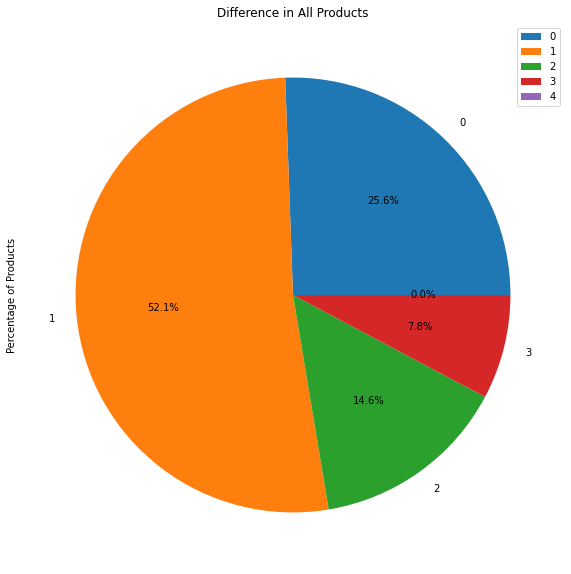

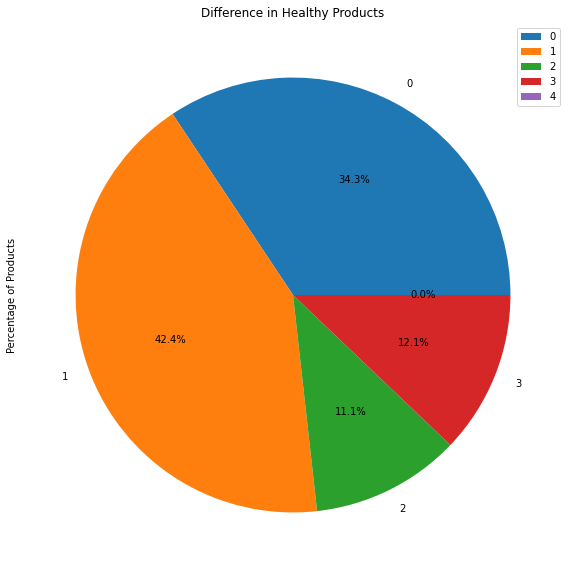

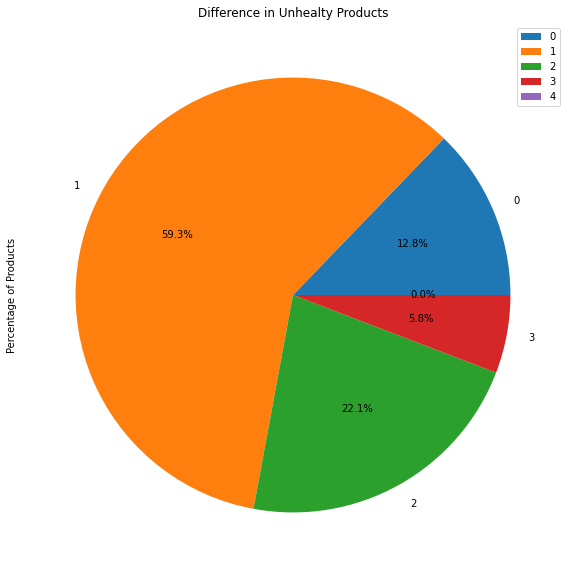

In [10]:
getScoreDif(dfAllProducts, "Difference in All Products")
getScoreDif(dfHealthy, "Difference in Healthy Products")
getScoreDif(dfUnhealthy, "Difference in Unhealty Products")

**Conclusion**

I would consider a distance of 0.0 and 1.0 a similar score. By looking at the pie chart we can see that most products have a similar score. We can also see that there are no distances above 3.0. This is across all datasets.

### 4.2 Scatter Plot

Since no big difference between the datasets could be made out, I will apply a scatter plot and three different correlation measures to the dfAllProducts dataframe. 

First I have to clean up the numerical eco-score and nutri-score columns. I have received errors, that there still appear to be empty strings. 

In [11]:
#got error becaause of some cells were empty in eco score score
def create_float(x):
    try:
        return float(x)
    except ValueError: 
        return 0.0

dfAllProducts["eco-score score"] = dfAllProducts["eco-score score"].apply(create_float)
dfAllProducts["nutri-score score"] = dfAllProducts["nutri-score score"].apply(create_float)

Then I create new variables that include the values from the numerical eco-score and nutri-score columns. I create the scatter plot and lastly try to confirm the strength and direction of the correlations. 

The three correlation measures are: stats.pearsonr, stats.spearmanr, stats.kendalltau

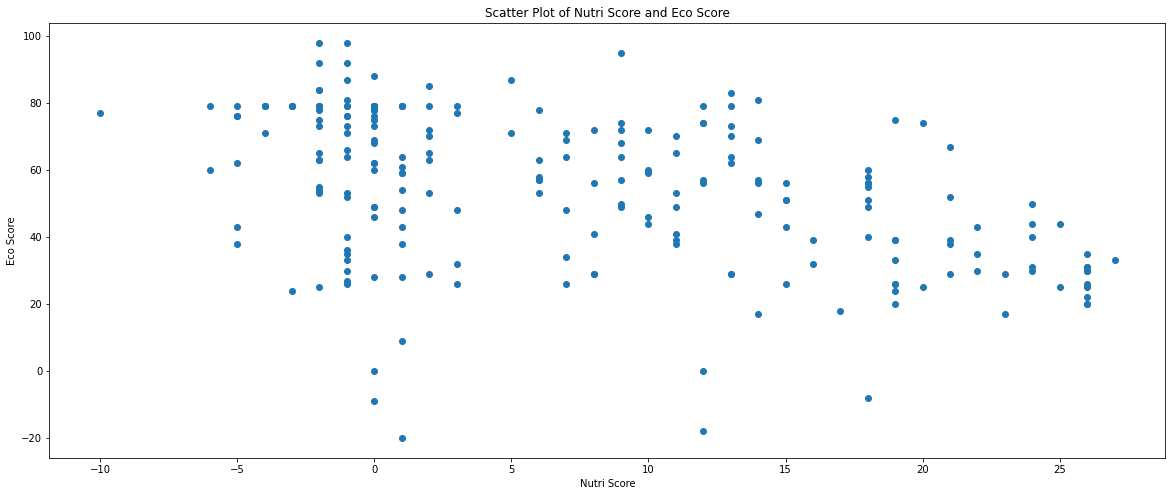

(-0.45469661618929785, 1.2675868234894069e-12)
SpearmanrResult(correlation=-0.4898217040676691, pvalue=1.1206360902571122e-14)
KendalltauResult(correlation=-0.3546251953013162, pvalue=3.339772080115056e-14)


In [12]:
nutri_score = dfAllProducts["nutri-score score"]
eco_score = dfAllProducts["eco-score score"]

#Code from the book: Data Science Crashkurs and
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.figure(figsize=(20, 8))
plt.scatter(nutri_score, eco_score)
plt.xlabel('Nutri Score')
plt.ylabel('Eco Score')
plt.title('Scatter Plot of Nutri Score and Eco Score')
plt.show()

#Code from the book: Data Science Crashkurs and https://docs.scipy.org
resPearsonr = stats.pearsonr(nutri_score, eco_score)
print(resPearsonr)

#Code from the book: Data Science Crashkurs and https://docs.scipy.org
resSpear = stats.spearmanr(nutri_score, eco_score)
print(resSpear)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
resTau = stats.kendalltau(nutri_score, eco_score)
print(resTau)

**Conclusion**

All correlation measures indicate a moderate negative correlation. A negative correlation means: As the values of one variable increase, the values of the other variable tend to decrease. This is due to the fact, that a good eco-score has a high numerical value and a good nutri-score has a low numerical value. This will be confirmed further down this project report. 

Therefore, we can conclude that there is a correlation and our main research question has been answered.  

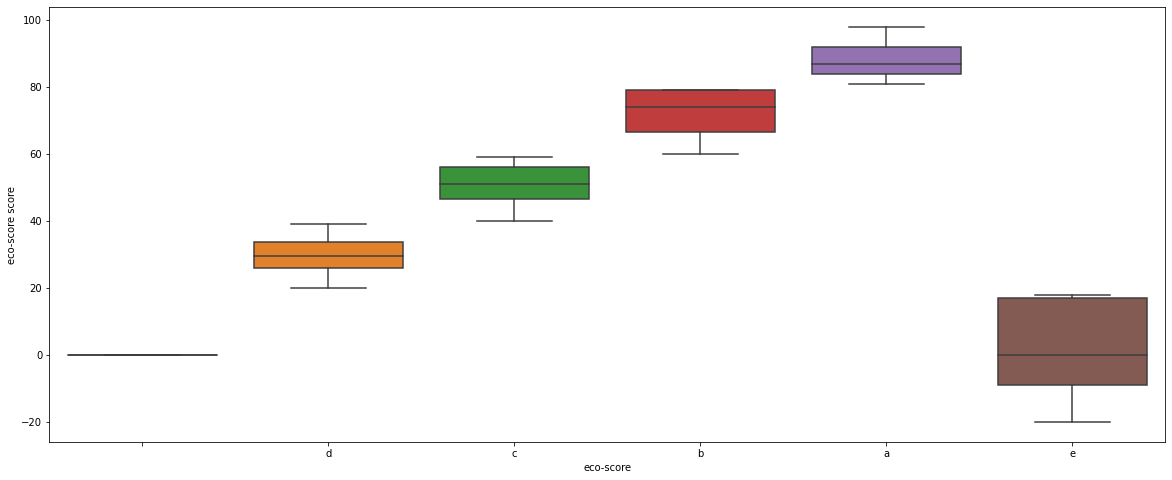

In [13]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="eco-score", y="eco-score score", data=dfAllProducts)
plt.show()

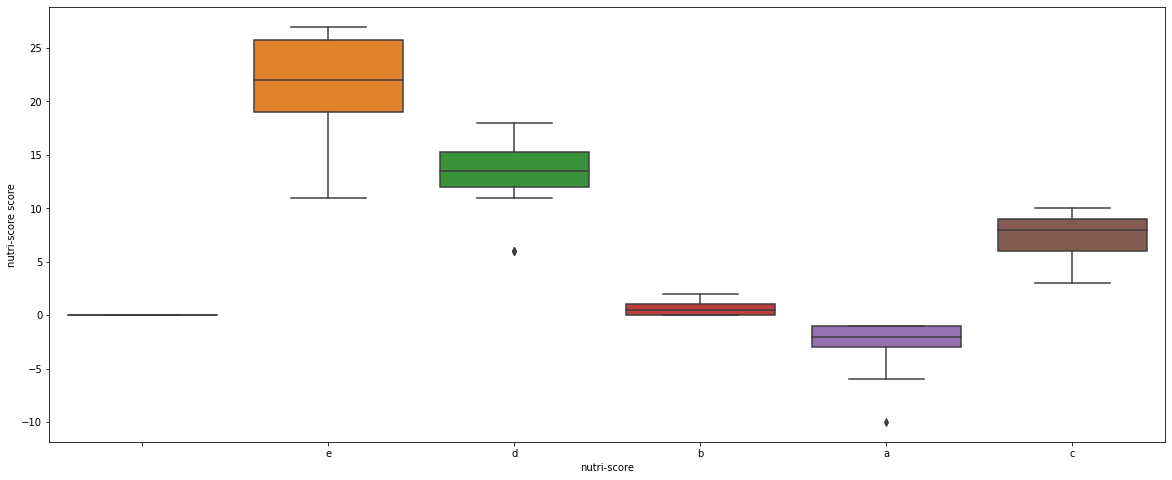

In [14]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="nutri-score", y="nutri-score score", data=dfAllProducts)
plt.show()

## 5. Causation of similar nutri-score and eco-score per product

Now i want to explore what are possible causations for the observed correlation

### 5.1 Sub data frames

I once again create new sub data frames. I do this firstly, to explore possible differences between products with high and low distances and to catch possible biases; and secondly, to seperate the data for further break-down as we are mostly intrested in the products with low distances. 

In [15]:
lowDif = dfAllProducts.loc[(dfAllProducts["distance"] == 0.0) | 
                           (dfAllProducts["distance"] == 1.0)]
lowDif

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
1,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26.0,35.0,1.0
2,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15.0,26.0,0.0
3,Nutella,"Breakfasts, Spreads, Sweet spreads, fr:Pâtes à...","sugar, palm oil, hazelnuts 13%, skim milk powd...",Ferrero,"Algérie,Belgique,France,Allemagne,Guadeloupe,I...",e,d,26.0,26.0,1.0
4,Sésame,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Farine de blé, sucre de canne roux, huile de c...",Gerblé,"Belgique,France,Guadeloupe,Martinique,Maroc,La...",b,c,1.0,59.0,1.0
5,Chocolate Excellence,"Snacks, Sweet snacks, Cocoa and its products, ...","cocoa mass, sugar, cocoa butter, vanilla,","Lindt,Lindt EXCELLENCE","Česko,Francie,Německo,Guadeloupe,Itálie,en:alg...",e,d,23.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210,Natur ohne Zucker,"Plant-based foods and beverages, Plant-based f...","soya base (water, hulled soya beans (10,7%)), ...",Alpro,"Österreich, Finnland, Irland, Spanien, en:alem...",a,a,-1.0,81.0,0.0
213,Basilica,"Condiments, Sauces, Sauces tomate, Sauces toma...","tomato pulp 71%, tomato concentrate 13.5%, oni...",Barilla,"Austria,Bélgica,Francia,Alemania,Italia,Luxemb...",a,a,-2.0,92.0,0.0
216,Mozzarella,"Dairies, Fermented foods, Fermented milk produ...","pasteurized whole milk, salt, citric acid",Galbani,"Francia,Germania,Italia,Giappone,Spagna,Svizzera",c,c,10.0,46.0,0.0
217,Harrys pain de mie american sandwich complet m...,"Aliments et boissons à base de végétaux, Alime...","whole wheat flour 38%, water, wheat flour, rap...",Harrys,"France,Suisse",b,b,0.0,79.0,0.0


In [16]:
highDif = dfAllProducts.loc[(dfAllProducts["distance"] == 2.0) | 
                            (dfAllProducts["distance"] == 3.0) | 
                            (dfAllProducts["distance"] == 4.0)]
highDif

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
6,Nutella biscuits,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...",chocolate spread with hazelnuts and cocoa 40% ...,Nutella,"France,Allemagne,Italie",e,c,25.0,44.0,2.0
7,Cruesli Mélange De Noix,"Aliments et boissons à base de végétaux, Alime...","Whole Oats 32%, Whole Wheat 18%, Glucose Syrup...",Quaker,"Belgium,France,French Polynesia,Guadeloupe,Ita...",a,d,-2.0,25.0,3.0
13,Fourrés Chocolat noir BIO,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","wheat flour* 39%, dark chocolate* 25% (cocoa m...",bjorg,"France,Luxembourg,Suisse",d,b,13.0,64.0,2.0
15,Céréales chocapic,"Aliments et boissons à base de végétaux,Alimen...","Ingrédients blé complet 35,0%, chocolat en pou...",Nestlé,"Belgique,France,Polynésie française,Guadeloupe...",a,d,-1.0,27.0,3.0
16,Pomme noisette,"Aliments et boissons à base de végétaux, Alime...","wheat flour 68,5 %, rapeseed oil, fruit sugar ...",Gerblé,"Belgique,France,Polynésie française,Guadeloupe...",a,c,-2.0,55.0,2.0
21,Pains au lait,"Aliments et boissons à base de végétaux, Alime...","blé flour 41%, sourdough 20% (blé flour 11%, w...","Pasquier,Brioche Pasquier","Belgique,France,Suisse,Royaume-Uni,États-Unis",d,b,13.0,62.0,2.0
32,Corn flakes,"Plant-based foods and beverages, Plant-based f...","corn, sugar, aroma of malt of barley , salt, v...","Kellogg's,","France,Italy,Luxembourg,Martinique,Belgique,Es...",b,d,2.0,29.0,2.0
35,"Snacks, TUC Original","Imbiss, Salzige Snacks, Vorspeisen, Crackers, ...","wheat flour, sunflower oil 17 %, barley malt e...","LU,Mondelez International",Germany,d,b,12.0,79.0,2.0
45,SKYR,"Produits laitiers, Desserts, Produits fermenté...","Lait écrémé, ferments lactiques (lait). Lait: ...",Danone,France,a,c,-5.0,43.0,2.0
46,Biscuits Figue et son,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","wholemeal wheat flour 26.5%, wheat flour 26.1%...",Gerblé,"Belgium,France,French Polynesia,Martinique,Mor...",a,c,-1.0,52.0,2.0


### 5.2 Word Cloud

First I create a word cloud to see the most promimnent categories mentioned in those subset. This is done to spot potential causations or other patterns. 

To do this we have to install the and import the libraries below. 

In [17]:
#pip install wordcloud
#conda install -c conda-forge wordcloud
#Code base from UoL Lectures https://www.coursera.org/learn/uol-cm2015-programming-with-data
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
#https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize 

#NLTK comes with many copora, toy grammars, trained models etc.
#A complete list is posted at: http://nltk.org/nltk_data/

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/severinaebi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/severinaebi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

This function creates the word cloud. It takes the data set and a column as arguments. 

In [18]:
#Word cloud categories for low differnce 
#refernece university

def generateWordCloud(dataSet, column):
    words = []
    data = dataSet
    index = data.index #define index of data 

    numbers_of_rows = len(index)

    for row in data[column]:
        words = words + nltk.word_tokenize(row)
        data_analysis = nltk.FreqDist(words)

    filter_words = dict([(m, n) for m,n in data_analysis.items() if len(m) > 4])
    #https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    #https://medium.com/analytics-vidhya/word-cloud-tutorial-in-python-b045e9d1e1b2
    wcloud = WordCloud(stopwords = STOPWORDS, 
                       background_color='white', 
                       max_words=20).generate_from_frequencies(filter_words)

    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    (-1.5, 200, 100, -2.5)
    plt.show()
    

The function is then called with both of the new data sets and with the column "category" as arguments. I wanted to see if there are possible patterns noticable within this column. 

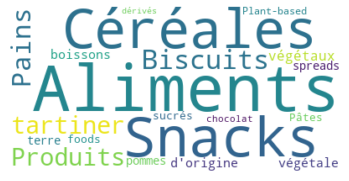

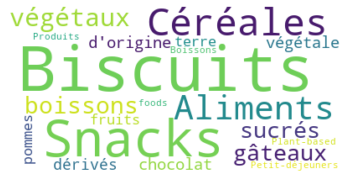

In [19]:
generateWordCloud(lowDif,"category")
generateWordCloud(highDif,"category")

**Conclusion**

There are no clear patterns or causations noticeable. The word cloud contains many generic categories like „Aliments“ which is french for food or snacks. This might require some further clean up, but in general we can say that the analysis on the basis of categories has its limitations. 

I did the same step as above, but this time with ingredients. 

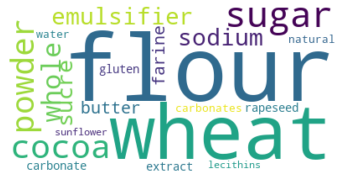

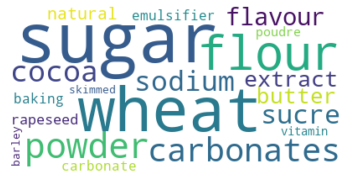

In [20]:
#do the same for ingredients 
#we also want to see if there are certain products / ingredients that match and have bad grades
generateWordCloud(lowDif,"ingredients")
generateWordCloud(highDif,"ingredients")

#maybe make a boxplot to see difference standard oder so

**Conclusion**

Once again no clear causation is identifiable. 

I can conclude that there is no category or ingredient that cleary causes similar eco and nutri-scores. 


## 6. Causation of low eco and nutri-scores per product

### 6.1 Sub data frames

Here I want to explore if there are some indicators identifiable that cause issues for one's health also well as issues for the environment. 

Once again I create new sub data sets. Those are seperated into products that have a low distance and are unhealthy as well as high distance and unhealthy. Low distance and unhealthy products have both the attributes of having bad eco and nutri-socres.

In [21]:
#do analysis removing words 
#create df with low dif and unhealthy 
lowDifUnhealthy = dfUnhealthy.loc[(dfUnhealthy["distance"] == 0.0) 
                                  | (dfUnhealthy["distance"] == 1.0)]
lowDifUnhealthy 

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
1,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26,35,1.0
2,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15,26,0.0
3,Nutella,"Breakfasts, Spreads, Sweet spreads, fr:Pâtes à...","sugar, palm oil, hazelnuts 13%, skim milk powd...",Ferrero,"Algérie,Belgique,France,Allemagne,Guadeloupe,I...",e,d,26,26,1.0
5,Chocolate Excellence,"Snacks, Sweet snacks, Cocoa and its products, ...","cocoa mass, sugar, cocoa butter, vanilla,","Lindt,Lindt EXCELLENCE","Česko,Francie,Německo,Guadeloupe,Itálie,en:alg...",e,d,23,29,1.0
11,Nocciolata Pâte à tartiner au cacao et noisettes,"Breakfasts,Spreads,Sweet spreads,fr:Pâtes à ta...","cane sugar*, hazelnut paste * 18,5 %, sunflowe...",Rigoni di Asiago,"Belgium,France,French Polynesia,Guadeloupe,Ita...",d,c,18,56,1.0
...,...,...,...,...,...,...,...,...,...,...
190,Noir Extra,"Snacks, Snacks sucrés, Cacao et dérivés, Choco...","sugar, cocoa paste, cocoa butter, lean cocoa p...",Poulain,France,e,d,21,29,1.0
191,Camembert,"Produits laitiers, Produits fermentés, Produit...","milk (origin france), lactic and ripening ferm...","Président,Lactalis","France,Belgium",d,c,14,47,1.0
194,Queso Crema Philadelphia Original,"Dairies, Fermented foods, Spreads, Fermented m...","whole milk, cream, milk protein preparation, c...",Kraft,"Bélgica,Francia,Alemania,Italia,Japón,México,M...",d,d,11,38,0.0
195,Granola Gros éclats de chocolat,"Snacks, Desserts, Sweet snacks, Biscuits and c...","wheat flour 34 %, chocolate 33,4 % [sugar, coc...","Lu,Mondelèz International","France,Nouvelle-Calédonie,La Réunion,Suisse",e,d,24,31,1.0


In [22]:
#unhealthy but ok ecological
highDifUnhealthy = dfUnhealthy.loc[(dfUnhealthy["distance"] == 2.0) | (dfUnhealthy["distance"] == 3.0) | (dfUnhealthy["distance"] == 4.0)]
highDifUnhealthy 

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance
6,Nutella biscuits,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...",chocolate spread with hazelnuts and cocoa 40% ...,Nutella,"France,Allemagne,Italie",e,c,25,44,2.0
13,Fourrés Chocolat noir BIO,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","wheat flour* 39%, dark chocolate* 25% (cocoa m...",bjorg,"France,Luxembourg,Suisse",d,b,13,64,2.0
21,Pains au lait,"Aliments et boissons à base de végétaux, Alime...","blé flour 41%, sourdough 20% (blé flour 11%, w...","Pasquier,Brioche Pasquier","Belgique,France,Suisse,Royaume-Uni,États-Unis",d,b,13,62,2.0
35,"Snacks, TUC Original","Imbiss, Salzige Snacks, Vorspeisen, Crackers, ...","wheat flour, sunflower oil 17 %, barley malt e...","LU,Mondelez International",Germany,d,b,12,79,2.0
51,Tomato Ketchup BIO,"Condiments, Sauces, Sauces tomate, Ketchup, Ke...","tomatoes (180 g per 100 g of ketchup), sugar, ...",Heinz,"Bélgica,Francia,Alemania,España,Suiza,Estados ...",d,b,13,79,2.0
52,Véritable Petit Écolier Chocolat au Lait,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","small butter 52%: wheat flour 68.1%, sugar, pa...","LU,Mondelez International","Belgium,France,Switzerland",e,c,24,40,2.0
53,20 Galettes : Traditional Butter Biscuits,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","wheat flour, sugar, butter (18%), eggs, natura...",St Michel,"Belgique,France,Guadeloupe,Italie,Martinique,S...",e,b,21,67,3.0
79,Amora Mayonnaise De Dijon Flacon Souple 415g,"Condiments,Sauces,Mayonnaises,Mayonnaises de D...","vegetable oils (sunflower, rapeseed), white wi...","Amora,unilever,Mayonnise De Dijon","Belgique,France,Suisse",e,c,22,43,2.0
81,Véritable Petit beurre,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","wheat flour 72 % sugar - butter 13,6 % skimmed...",LU,"Belgique,France,Guadeloupe,Liban,La Réunion,Su...",e,b,19,75,3.0
84,Petites madeleines,"Snacks, Snacks sucrés, Biscuits et gâteaux, Gâ...","wheat flour (32%), rapeseed oil, non-hydrogena...","St Michel,","France,Martinique,La Réunion,Suisse,",d,a,14,81,3.0


Once again we generate word clouds with the generateWordCloud() function.

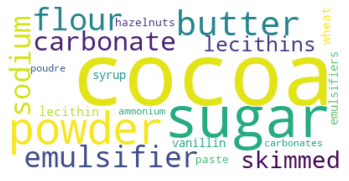

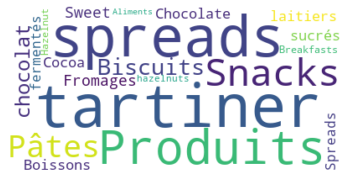

In [23]:
generateWordCloud(lowDifUnhealthy,"ingredients")
generateWordCloud(lowDifUnhealthy,"category")

**Conclusion**
The ingredients word cloud is showing some interesting data. What stands out is the ingredient cocoa. It does make intuitive sense that products with cocoa as one of their ingredients have a bad nutri-score and eco-score. Cocoa is often used in chocolaty sweets and is produced in exotic places. This could indicate that the ingredient travels far to be further processed. 

It would make sense to further analyse the ingredients. 

Once again the category word cloud is not indicative.

Here I generate the word clouds for the products that have a bad nutri-score but a better eco-score. I have done this to see if there are differences betweens those two data sets. highDifUnhealthy acts in this case as a controll group.

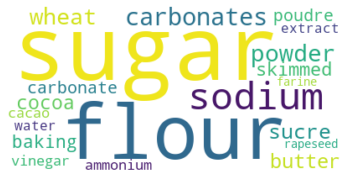

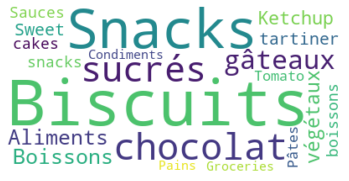

In [24]:
#unhealthy but ok ecological
generateWordCloud(highDifUnhealthy,"ingredients")
generateWordCloud(highDifUnhealthy,"category")

**Conclusion**

The ingredients word cloud is showing notable differences. Cocoa is represented in a smaller font-size, therefore less mentioned in the ingredients column. Once again this indicates that cocoa could be a causation. Also what is missing here is hazelnuts.

Also here category is not indicative. 

Below is a function that creates a word cloud but removes the frist 10 entires - just to check if there are possible biases.

In [25]:
def generateWordCloudCleaned(dataSet, column):
    words = []
    data = dataSet
    index = data.index #define index of data 

    numbers_of_rows = len(index)

    for row in data[column]:
        words = words + nltk.word_tokenize(row)
        data_analysis = nltk.FreqDist(words)

    filter_words = dict([(m, n) for m,n in data_analysis.items() if len(m) > 4])
    #https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    filter_words = dict(sorted(filter_words.items(), 
                               key=lambda item: item[1], 
                               reverse=True))
    #print(filter_words)
    for i in range(10):
        key = next(iter(filter_words))
        filter_words.pop(key)
    #https://medium.com/analytics-vidhya/word-cloud-tutorial-in-python-b045e9d1e1b2
    wcloud = WordCloud(stopwords = STOPWORDS,
                       background_color='white', 
                       max_words=20).generate_from_frequencies(filter_words)

    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    (-1.5, 200, 100, -2.5)
    plt.show()

Here I call the generateWordCloudCleaned() for both data sets on the column ingredients. This is to remove generic ingredients like water or sugar. 

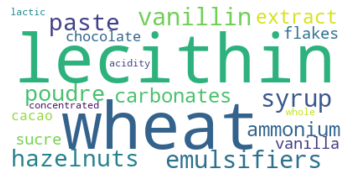

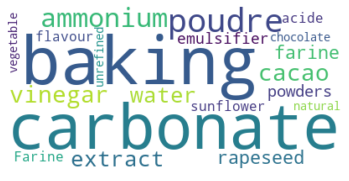

In [26]:
#generates a cleaned word cloud
generateWordCloudCleaned(lowDifUnhealthy,"ingredients")
generateWordCloudCleaned(highDifUnhealthy,"ingredients")

Despite removing the first 10 entries, the word cloud still contains rather generic ingredients. What stands out here is that lecithin and hazelnuts are more prominent than before in the lowDifUnhealthy data set.

Interestingly, lecithin is not an ingredient per se, but mentioned in combination with another component such as soy or sunflower. [6]

In order to see possbile combinations I will scrap a list from an online source. (https://www.botanical-online.com/en/food/lecithin-rich-food)

In [27]:
#https://d3c33hcgiwev3.cloudfront.net/cmYGiKNgTg2mBoijYK4NXg_2ead7d3d1dd14ff89e2a549e15f085e1_Journalistic-Voice-Project-Proposal-2-.html?Expires=1672531200&Signature=HCq8O1yjUWmdGZN7YWH-nlL3vaOs7Ar9h1sqMuisomq4HOQpS~oy3MzUvUNpmcIcEQDHVhlUDYo1pOzPX64df1~ftdwY~AN6w5CVVEjZQKV600MZM4mK46H99NqTLc97JBhJYMJ-0irBRy9Czp~9dVMrmZsn7SL2pEPhY4Q2EMU_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A#1.3-Data
#Code from lectures and midterm sample provided in the module
def getWebpageList(url):
    # Check that page is accessible for scraping 
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/93.0",
               "Upgrade-Insecure-Requests":"1", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
               "DNT":"1"}
    
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        soup = 'error'
    else:
        content = response.content
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        trElements = soup.find_all("tr")
        products = []
        
        for tr in trElements:
            tdElements = tr.find_all("td")
            if tdElements:
                products.append(tdElements[0].text)
                
    return products

In [28]:
#create and display data frame from page below 
dfLecithin = pd.DataFrame(getWebpageList("https://www.botanical-online.com/en/food/lecithin-rich-food"))
dfLecithin[:17] #entries from index 17 on contained unrelated information

,0
0,Granulated soy lecithin
1,Soy lecithin supplement (liquid)
2,Eggs (in the yolk)
3,Liver
4,Brazil nuts
5,Poppy seeds
6,Soy and derivatives
7,Black lentil
8,Ground flax seeds
9,Peanut


### 6.2 Supply Chain 

In this analysis, I update the data sets with number of countries in order to analyse the supply chain of products.
This is done by splitting the string of the column "countries" and by counting the number of substrings. We first update the parent data set. Then all sub data sets are updated.  

In [29]:
#https://thecleverprogrammer.com/2022/06/22/count-number-of-words-in-a-column-using-python/
dfAllProducts["Number of Countries"] = dfAllProducts["countries"].apply(lambda n: len(n.split(",")))
dfAllProducts["Number of Countries"] = dfAllProducts["Number of Countries"].astype(float)

#dataset unhealthy products 
dfUnhealthy = dfAllProducts.loc[(dfAllProducts["nutri-score"] == "d") | 
                                (dfAllProducts["nutri-score"] == "e")]
#dataset healty products (excluding c)
dfHealthy = dfAllProducts.loc[(dfAllProducts["nutri-score"] == "a") | 
                              (dfAllProducts["nutri-score"] == "b")]

lowDif = dfAllProducts.loc[(dfAllProducts["distance"] == 0.0) | 
                           (dfAllProducts["distance"] == 1.0)]

highDif = dfAllProducts.loc[(dfAllProducts["distance"] == 2.0) | 
                            (dfAllProducts["distance"] == 3.0) | 
                            (dfAllProducts["distance"] == 4.0)]

highDifUnhealthy = dfUnhealthy.loc[(dfUnhealthy["distance"] == 2.0) | 
                                   (dfUnhealthy["distance"] == 3.0) | 
                                   (dfUnhealthy["distance"] == 4.0)]

lowDifUnhealthy = dfUnhealthy.loc[(dfUnhealthy["distance"] == 0.0) | 
                                  (dfUnhealthy["distance"] == 1.0)]




This function creates a data frame that contains the amount of products grouped by the number of countries in its supply chain. 

In [30]:
def countryPlotPie(dataset):
    #new data frame 
    pie = pd.DataFrame({"Amount of Products": [len(dataset.loc[dataset["Number of Countries"] <= 3]), 
                                                len(dataset.loc[(dataset["Number of Countries"]<= 6) & (dataset["Number of Countries"] > 3)]), 
                                                len(dataset.loc[(dataset["Number of Countries"]<= 9) & (dataset["Number of Countries"] > 6)]),
                                                len(dataset.loc[(dataset["Number of Countries"]<= 12) & (dataset["Number of Countries"] > 9 )]), 
                                                len(dataset.loc[dataset["Number of Countries"] >= 13])]},
                       index = ['less or euqual 3 Countries', 'less or euqual 6 Countries', '9 Countries', '12 Countries', '>=13'])

    return pie

I call the countryPlotPie() function for the data sets lowDifUnhealthy and highDifUnhealthy.

In [31]:
countryPlotPie(lowDifUnhealthy)

,Amount of Products
less or euqual 3 Countries,21
less or euqual 6 Countries,20
9 Countries,8
12 Countries,7
>=13,6


In [32]:
countryPlotPie(highDifUnhealthy)

,Amount of Products
less or euqual 3 Countries,13
less or euqual 6 Countries,8
9 Countries,2
12 Countries,1
>=13,0


Then I generate a pie chart to visualise the product distribution within those supply chain groups. 

Below we can see that products with a low distance and bad nutri-score have a larger supply chain than products with a high distance and bad nutri-score. This indicates that if there is a causation it can most likely be traced back to a products ingredient. 

<AxesSubplot:title={'center':'Number of supply chain countries for products with a high distance and bad nutri-score'}, ylabel='Amount of Products'>

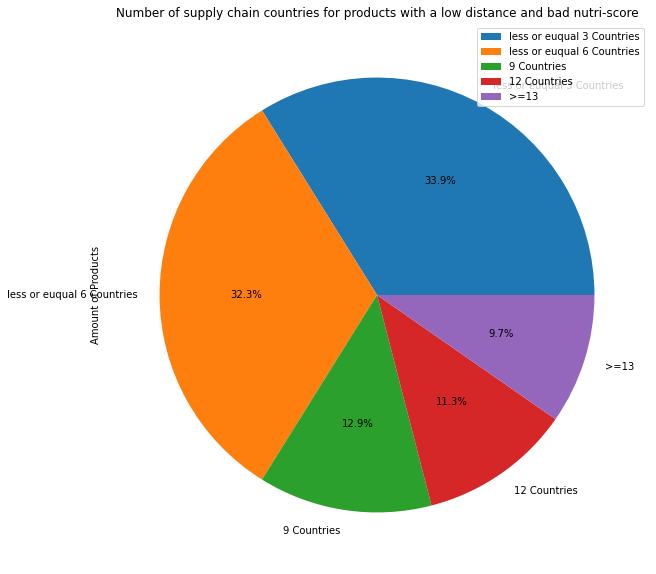

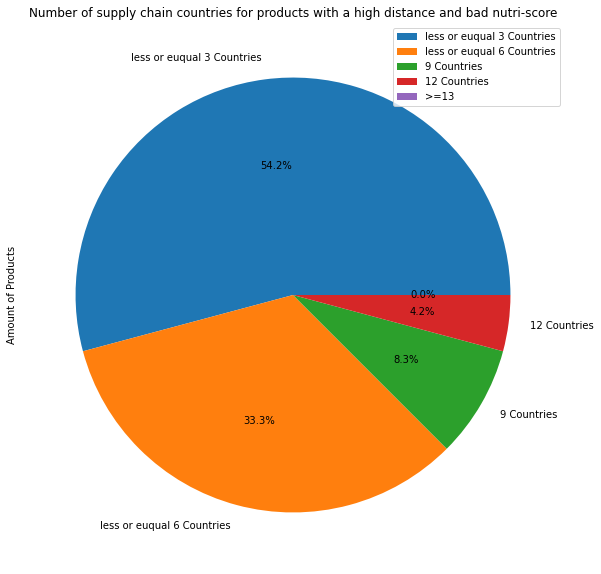

In [33]:
#low differnece unhealthy
#create pie
countryPlotPie(lowDifUnhealthy).plot.pie(x="Number of Supply Chain Countires", y="Amount of Products",
                                         figsize=(10, 10), 
                                         title = "Number of supply chain countries for products with a low distance and bad nutri-score", 
                                         autopct='%1.1f%%')
countryPlotPie(highDifUnhealthy).plot.pie(y="Amount of Products",figsize=(10, 10),
                                          title = "Number of supply chain countries for products with a high distance and bad nutri-score",
                                          autopct='%1.1f%%')

### 6.3 Further breakdowns on categories and ingredients 

This function takes a data set and a columns as arguments. Its purpose is to return a data frame of words mentioned in the column of the data set and the number of times each was mentioned and then sorts it to get the most mentioned words.

In [34]:
def getWordCount(dataSet, column):
    words = []
    data = dataSet
    index = data.index #define index of data 

    numbers_of_rows = len(index)

    for row in data[column]:
        words = words + nltk.word_tokenize(row)
        data_analysis = nltk.FreqDist(words)

    filter_words = dict([(m, n) for m,n in data_analysis.items() if len(m) > 4])
    #sort the df
    #Code from the book: "Data Science Crashkurs"
    filter_words = dict(sorted(filter_words.items(), key=lambda item: item[1], reverse=True))

    #https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
    return pd.DataFrame(filter_words.items(), columns=[column, "Word Count"])


To assure that I am not missing any possible patterns, I have applied a further break down on the category column. Despite the fact that this column has not provided any indicators so far.  

In [35]:
#creat new data frame for categories
dfCategories = getWordCount(lowDifUnhealthy, "category")
dfCategories                  

,category,Word Count
0,tartiner,56
1,spreads,49
2,Produits,44
3,Snacks,38
4,Pâtes,30
...,...,...
217,Camemberts,1
218,pasteurized-camembert,1
219,alcool,1
220,sucre,1


In [36]:
#create list of 20 most mentioned categories
dfCatStrings = dfCategories[:21]
#create list out of dataframe 
listString = dfCatStrings["category"].to_list()

I have extracted a list with the 20 most mentioned categories. 
Then I have created a mask that contains all products that match any string from the list in the category column. This mask was then applied to a new data frame. The index of the data frame was reset, in order to join it with another dataframe. 

In [37]:
#create a mask
#Code from the book: Data Science Crashkurs
mask = dfAllProducts["category"].str.contains('|'.join(listString))
#assign mask to a new df
new_dfCategories = dfAllProducts[mask]
#reset index
new_dfCategories = new_dfCategories.reset_index(drop=True)
new_dfCategories
#new df of products that contain any of those categorey


,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance,Number of Countries
0,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26.0,35.0,1.0,1.0
1,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15.0,26.0,0.0,16.0
2,Nutella,"Breakfasts, Spreads, Sweet spreads, fr:Pâtes à...","sugar, palm oil, hazelnuts 13%, skim milk powd...",Ferrero,"Algérie,Belgique,France,Allemagne,Guadeloupe,I...",e,d,26.0,26.0,1.0,11.0
3,Sésame,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Farine de blé, sucre de canne roux, huile de c...",Gerblé,"Belgique,France,Guadeloupe,Martinique,Maroc,La...",b,c,1.0,59.0,1.0,7.0
4,Chocolate Excellence,"Snacks, Sweet snacks, Cocoa and its products, ...","cocoa mass, sugar, cocoa butter, vanilla,","Lindt,Lindt EXCELLENCE","Česko,Francie,Německo,Guadeloupe,Itálie,en:alg...",e,d,23.0,29.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
187,Sablé Nature sans sucres,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","wheat flour 58.5%, sweetener: maltitols of veg...",Gerblé,"France,Suisse,États-Unis",a,c,-2.0,54.0,2.0,3.0
188,Sablé saveur Citron Yuzu au Maltitol,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de _blé_ 57,9%, édulcorant : maltitols ...",Gerblé,"Belgium,France,Switzerland",a,c,-2.0,53.0,2.0,3.0
189,Harrys pain de mie american sandwich complet m...,"Aliments et boissons à base de végétaux, Alime...","whole wheat flour 38%, water, wheat flour, rap...",Harrys,"France,Suisse",b,b,0.0,79.0,0.0,2.0
190,Pâte à tarte feuilletée - Pur beurre,"Aliments et boissons à base de végétaux, Alime...","wheat flour origin france 50%, water, pastry b...",Marie,"France,Suisse",d,b,18.0,60.0,2.0,2.0


Then I have extracted all substrings that were matched in a product and created a new data frame. So if a product had four matches those four matches were added to the data frame. This data frame inclueds the index of the prior data frame. This is needed to match those and create new data frame. Here it is called df join. 

After the data frames were joined I grouped them by the category with the groupby() method. This can then be used to calculate the average distance per category for example. 

In [38]:
#Code from the book: Data Science Crashkurs
dfExtractString = new_dfCategories["category"].str.extractall('(' + '|'.join(listString) + ')')
dfExtractString.reset_index(inplace=True)
dfExtractString
dfJoin = dfExtractString.join(new_dfCategories, on="level_0")
dfJoin.rename(columns={0: 'top categories'}, inplace=True)
grouped_df = dfJoin.groupby(['top categories'])

#created those data frames in case I wanted to make further anlysis at a later point.
avg_df = grouped_df['distance'].mean().reset_index()
std_df = grouped_df['distance'].std().reset_index()

Below is a seaborn box plots with the top categories on the x axis and the number of countries on the y axis. It shows the distribution of countries per category.

The box plot is a diagram used to visually represent a distribution of at least one ordinally scaled characteristic. A box plot is intended to quickly give an impression of the range in which the data lie and how they are distributed over this range. Therefore, all values of the so-called five-point summary, i.e. the median, the two quartiles and the two extreme values, are shown. [7] 

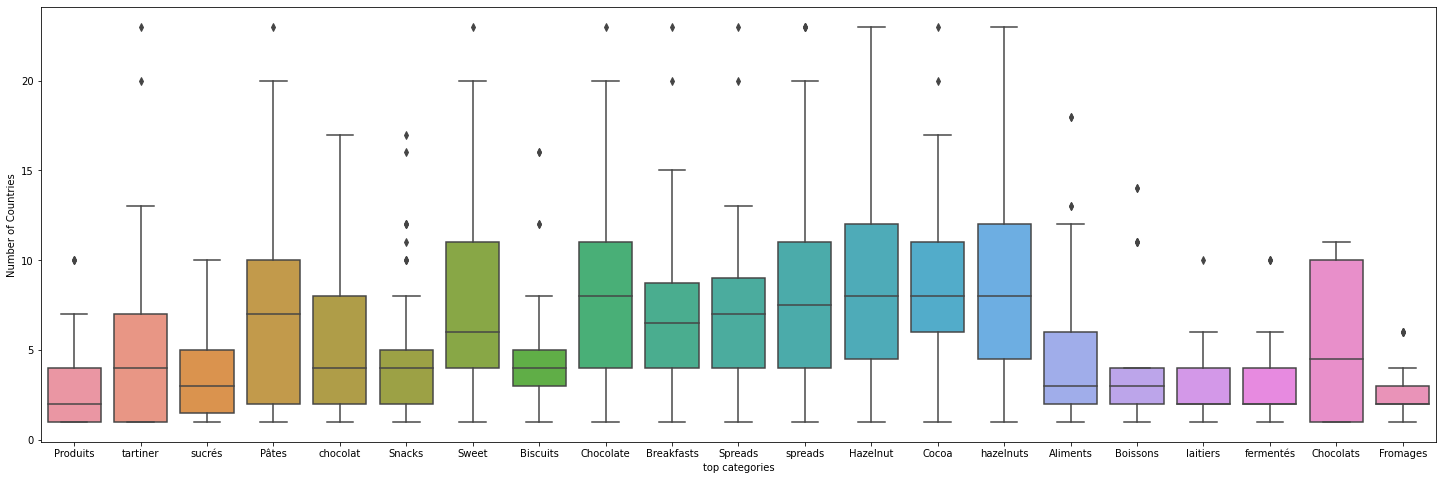

In [39]:
#https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
plt.figure(figsize=(25, 8))
sns.boxplot(x="top categories", y="Number of Countries", data=dfJoin)
plt.show()

This box plot shows the distribution of distances per category. 

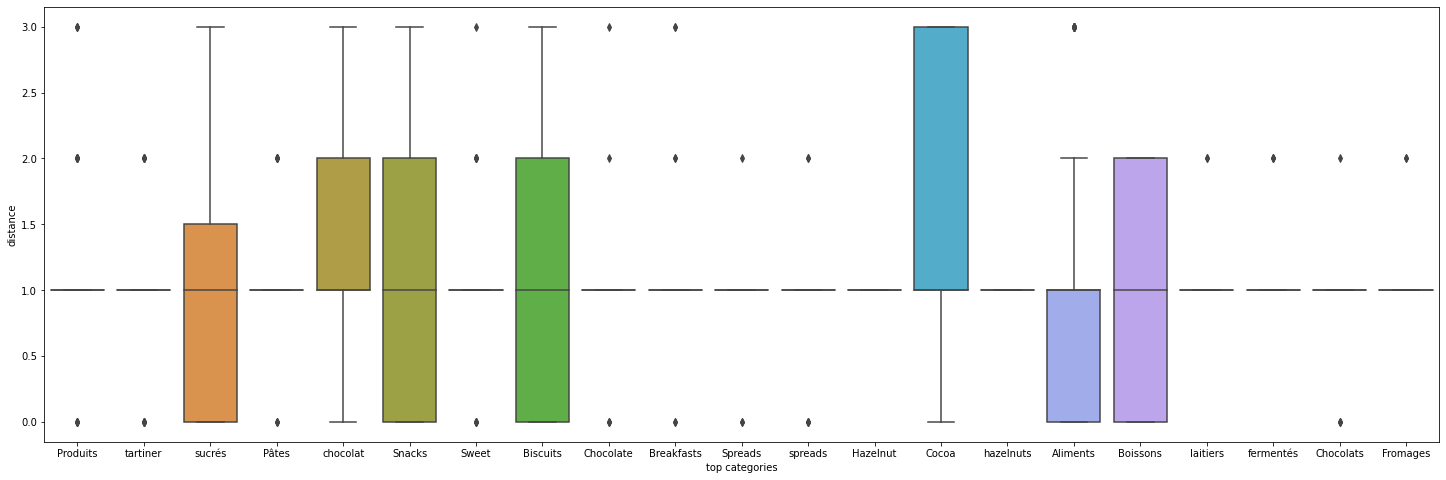

In [40]:
#https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
plt.figure(figsize=(25, 8))
sns.boxplot(x="top categories", y="distance", data=dfJoin)
plt.show()

**Conclusion**

The distance box plot was not able to provide any patterns or indicators. But the box plot showing the distributions of number of supply chain countries showed that the boxes of the categories hazelnut, cocoa and chocolate started and ended higher on the y-axis then most other categories. 

But those categories are also ingredients.

We can finally conclude that the food categories in this data set are not able to provide any indicators on a posssible causation. 

I have applied the same break down but this time for the ingredients column. 

In [41]:
#do the same for ingredients of un unhealthy product with low differnce
dfIngredientsBreakDown = getWordCount(lowDifUnhealthy, "ingredients")
dfIngredientsBreakDown

,ingredients,Word Count
0,cocoa,64
1,sugar,57
2,powder,50
3,butter,29
4,flour,24
...,...,...
333,autres,1
334,antioxydant,1
335,ascorbique,1
336,édulcorant,1


In [42]:
#create list of 10 most used ingredients
dfMostUsedIng = dfIngredientsBreakDown[:21]
#create list out of dataframe 
ingStrings = dfMostUsedIng["ingredients"].to_list()
ingStrings

['cocoa',
 'sugar',
 'powder',
 'butter',
 'flour',
 'emulsifier',
 'sodium',
 'carbonate',
 'skimmed',
 'lecithins',
 'lecithin',
 'wheat',
 'emulsifiers',
 'vanillin',
 'syrup',
 'hazelnuts',
 'paste',
 'poudre',
 'carbonates',
 'ammonium',
 'extract']

In [43]:
mask = dfAllProducts["ingredients"].str.contains('|'.join(ingStrings))
maskedDfMostUsed = dfAllProducts[mask]
maskedDfMostUsed = maskedDfMostUsed.reset_index(drop=True)
maskedDfMostUsed

,name,category,ingredients,manufacturer,countries,nutri-score,eco-score,nutri-score score,eco-score score,distance,Number of Countries
0,Nutella,"Petit-déjeuners,Produits à tartiner,Produits à...","sugar, palm oil, hazelnuts 13%, skim milk pow...",Ferrero,,e,d,26.0,35.0,1.0,1.0
1,Prince,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Cereal 50, 7% Blé Flour 35%, Whole Wheat Flour...","Lu,Mondelez","Algérie,Belgique,France,Polynésie française,Al...",d,d,15.0,26.0,0.0,16.0
2,Nutella,"Breakfasts, Spreads, Sweet spreads, fr:Pâtes à...","sugar, palm oil, hazelnuts 13%, skim milk powd...",Ferrero,"Algérie,Belgique,France,Allemagne,Guadeloupe,I...",e,d,26.0,26.0,1.0,11.0
3,Sésame,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...","Farine de blé, sucre de canne roux, huile de c...",Gerblé,"Belgique,France,Guadeloupe,Martinique,Maroc,La...",b,c,1.0,59.0,1.0,7.0
4,Chocolate Excellence,"Snacks, Sweet snacks, Cocoa and its products, ...","cocoa mass, sugar, cocoa butter, vanilla,","Lindt,Lindt EXCELLENCE","Česko,Francie,Německo,Guadeloupe,Itálie,en:alg...",e,d,23.0,29.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
159,Sablé saveur Citron Yuzu au Maltitol,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Farine de _blé_ 57,9%, édulcorant : maltitols ...",Gerblé,"Belgium,France,Switzerland",a,c,-2.0,53.0,2.0,3.0
160,Mozzarella,"Dairies, Fermented foods, Fermented milk produ...","pasteurized whole milk, salt, citric acid",Galbani,"Francia,Germania,Italia,Giappone,Spagna,Svizzera",c,c,10.0,46.0,0.0,6.0
161,Harrys pain de mie american sandwich complet m...,"Aliments et boissons à base de végétaux, Alime...","whole wheat flour 38%, water, wheat flour, rap...",Harrys,"France,Suisse",b,b,0.0,79.0,0.0,2.0
162,Pâte à tarte feuilletée - Pur beurre,"Aliments et boissons à base de végétaux, Alime...","wheat flour origin france 50%, water, pastry b...",Marie,"France,Suisse",d,b,18.0,60.0,2.0,2.0


In [44]:
dfExtractStringIng = maskedDfMostUsed["ingredients"].str.extractall('(' + '|'.join(ingStrings) + ')')
dfExtractStringIng.reset_index(inplace=True)
dfExtractStringIng
dfJoinIng = dfExtractStringIng.join(maskedDfMostUsed, on="level_0")
dfJoinIng.rename(columns={0: 'Mosted Unhealty Ingredients'}, inplace=True)
groupedIng_df = dfJoinIng.groupby(['Mosted Unhealty Ingredients'])

The box plot below shows the distribution of numbers of supply chain countries per ingredient. 

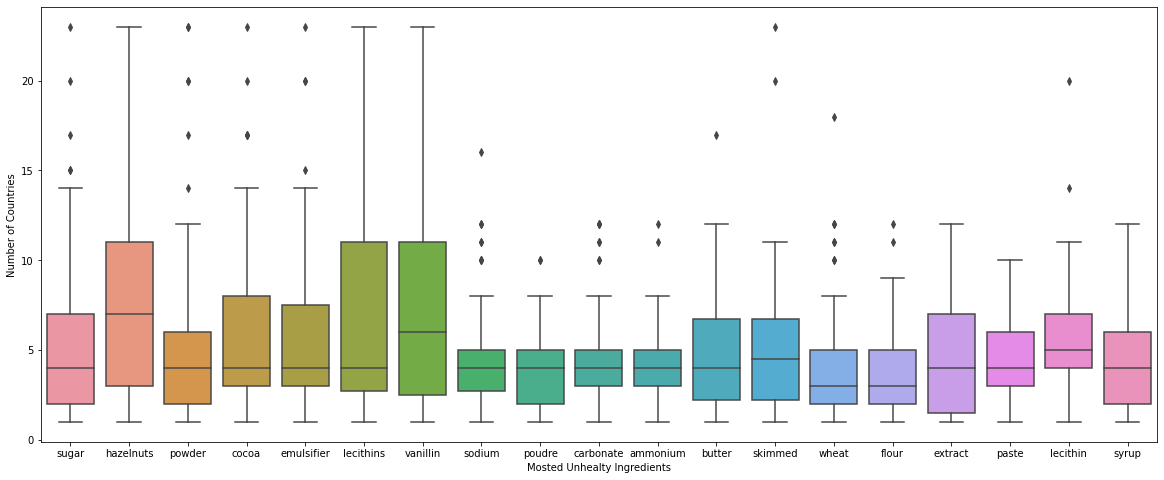

In [45]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Mosted Unhealty Ingredients", y="Number of Countries", data=dfJoinIng)
plt.show()

**Conclusion**

The boxes of hazelnuts, vanilla, lecithins and vanillin end on higher numbers on the y-axis than other ingredients. Surprisingly, cocoa does not belong in this category. 

The plot below shows the distribution of eco-scores. 

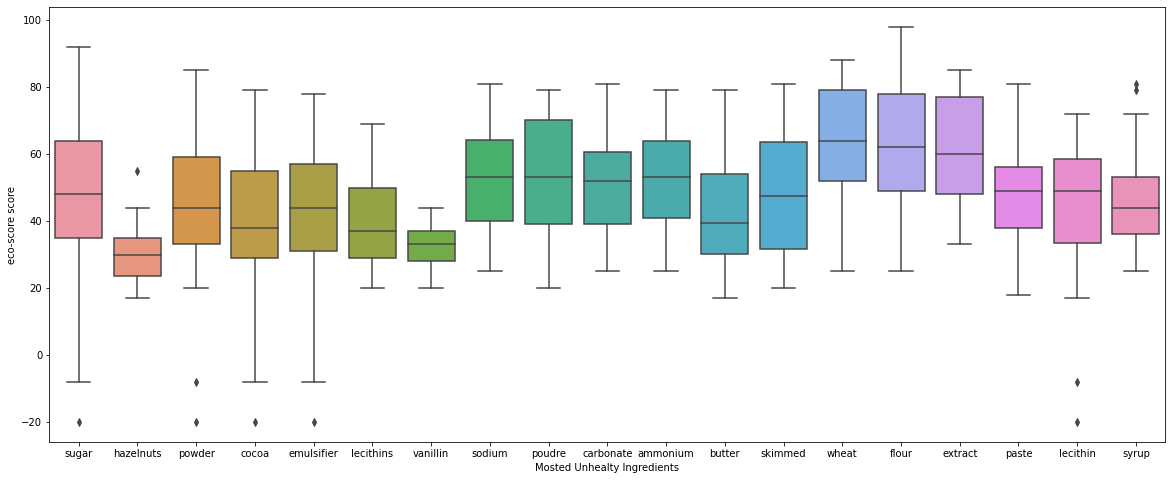

In [46]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Mosted Unhealty Ingredients", y="eco-score score", data=dfJoinIng)
plt.show()

The plot below shows the distribution of nutri-scores. 

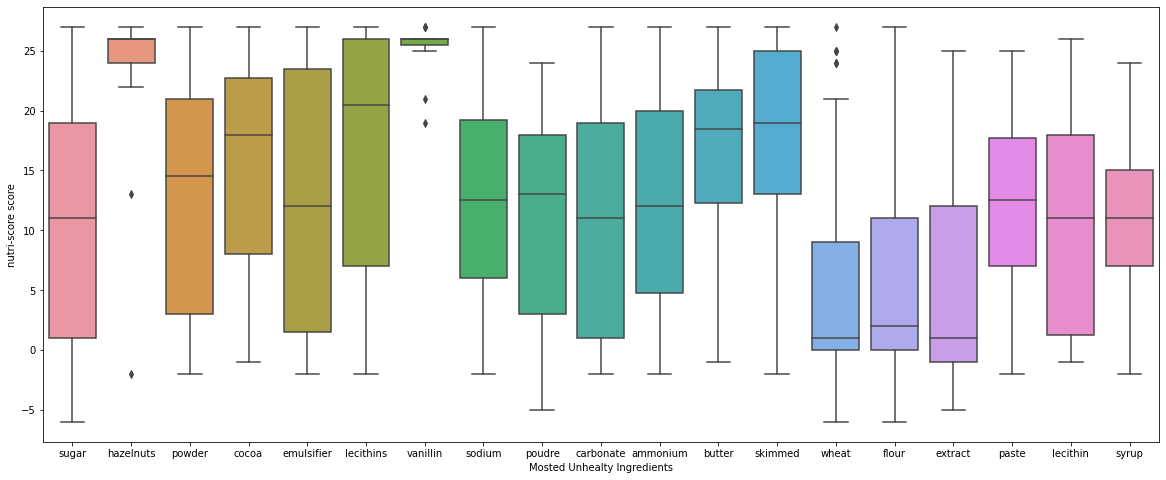

In [47]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Mosted Unhealty Ingredients", y="nutri-score score", data=dfJoinIng)
plt.show()

**Conclusion**
The plots show that products containing vanillin and hazelnuts have rather low eco-scores and nutri-scores. This indicates that prodcuts containing vanillin or/and hazelnuts have a tendecy to have low nutritional value and negative impacts on the enviornment. 

The low eco-score could be explained with the relativley high number of supply chain countries for both products. The low nutri-score would require further research. This is not in the scope of this project, but it is resonable to assume that those are ingredients often used in high sugar content products. 

<AxesSubplot:xlabel='eco-score', ylabel='Number of Countries'>

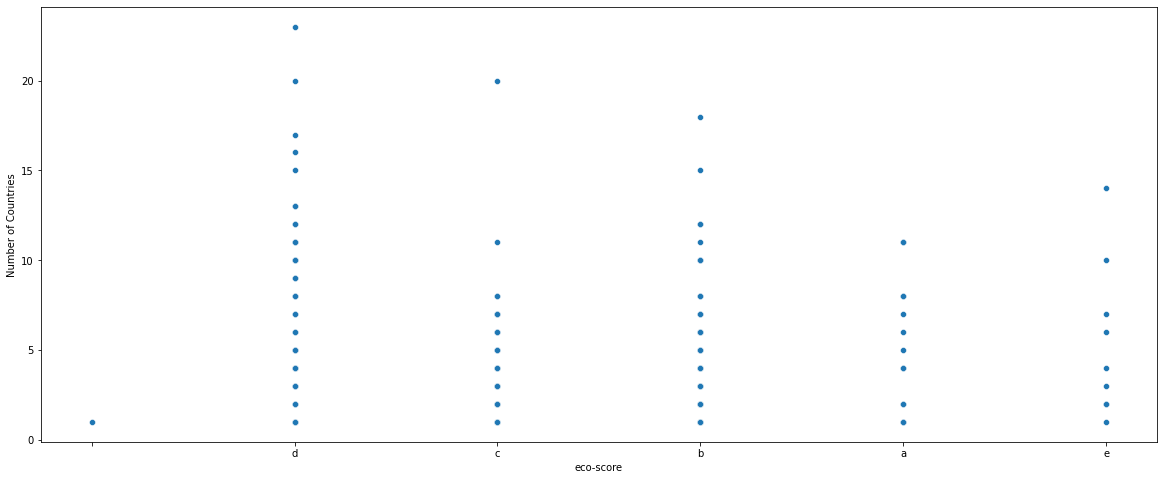

In [48]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x="eco-score", y="Number of Countries", data=dfAllProducts)

This confirms a correlation between eco-score and number of countries, and a missing correlation between nutri-score and number of countries, I have once again used the correlation methods. 

In [49]:
nrCountires = dfJoinIng["Number of Countries"]
eco_scoreIng = dfJoinIng["eco-score score"]

resPearsonr = stats.pearsonr(nrCountires, eco_scoreIng)
print(resPearsonr)

resSpear = stats.spearmanr(nrCountires, eco_scoreIng)
print(resSpear)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
resTau = stats.kendalltau(nrCountires, eco_scoreIng)
print(resTau)

(-0.3039281345420757, 4.8958250737865746e-29)
SpearmanrResult(correlation=-0.20120614608243484, pvalue=2.8174735157245446e-13)
KendalltauResult(correlation=-0.14369220289951048, pvalue=4.708073746243356e-13)


In [50]:
nrCountires = dfJoinIng["Number of Countries"]
nutri = dfJoinIng["nutri-score score"]


resPearsonr = stats.pearsonr(nrCountires, nutri)
print(resPearsonr)

resSpear = stats.spearmanr(nrCountires, nutri)
print(resSpear)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
resTau = stats.kendalltau(nrCountires, nutri)
print(resTau)

(0.20143550011115413, 2.644846199387701e-13)
SpearmanrResult(correlation=0.11675702761954572, pvalue=2.5681382670148207e-05)
KendalltauResult(correlation=0.08671801536396383, pvalue=1.5542858472935345e-05)


Result:
Weak but existing correlation between number of countries and eco score.
No significant correlation between number of countries and eco score. 

## 7. Summary

### 7.1 Conclusions on research questions

#### Is there a correlation between Nutri Score and Eco Score?
If we consider a distance of 0.0 and 1.0 between scores a similar score, then my research has showed that there is a moderate negative correlation between "Nutri-Score" and "Eco-Score". 77.3% of products fall in this category where 24.6% have the same rating for both scores. 52.7% are one score apart.

#### If so is there a causation identifiable?
My reasearch was not able to find a clear causation. I was not able to identifiy ingredients or categories that suggest a causation of a similar score. But my research showed that if there were a causation it would be in relation to a products ingredients rather than its categories. 

#### Are there any specific ingredients that cause bad Nutri-Scores and Eco-Score?
The ingredients vanillin and hazelnuts appear to cause low nutri and eco-score in most cases. This indicates that prodcuts containing vanillin or/and hazelnuts have a tendecy to have low nutritional value and negative impacts on the enviornment. The eco-score appars to be a result of a rather large supply chain for those products. I was not able to find indicators for the causation of the bad nutri-score. But the causation was not part of this sub research question. 

### 7.2 Limitations to my approach
There are limitations to my approach and data set. I have taken the first three pages of openfoodfacts.org in order to avoid further biases in the data set. If I would have chosen products of three different categories, I would have possibly created additional biases in the data set. There already is a possiblity of bias in the data set without further filtering. There is a possibilty that the volunteers of the Open Food Fact database might add "unhealthy" products or sweets more often. 

In my research I have spent a lot of time analysing the cateogries of products, despite it being clear early on that there probably will not be any indicators or patterns aiding me in answering my research questions. 

I was also limited in my knowledge of data science and data analysing methods. I have spent more time researching methods and understanding different types of visualisations than the actual analysis of my data set. 

Please note that the data is web scraped, conclusions may vary if web scraping is performed again at a later time. Therefore, a time-stamped archive is stored as a PDF in the archive.

## 8. References

[1] Open food facts (2023) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Open_Food_Facts (Accessed: January 7, 2023). 

[2] Nutri-score (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Nutri-Score (Accessed: January 7, 2023). 

[3] Eco-score (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Eco-score (Accessed: January 7, 2023). 

[4] Nutri-score (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Nutri-Score (Accessed: January 7, 2023). 

[5] Eco-score (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Eco-score (Accessed: January 7, 2023). 

[6] Lecithin (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Lecithin (Accessed: January 7, 2023). 

[7] Box-plot (2022) Wikipedia. Wikimedia Foundation. Available at: https://de.wikipedia.org/wiki/Box-Plot (Accessed: January 7, 2023). 


### 8.1 Resources 

**Data Set Scources**

openfoodfacts.org

botanical-online.com/en/food/lecithin-rich-food


**Code Sources**
- (2023) Journalistic Voice: exploring the differences between the writing styles of political editors for four UK news sites. University of London. Available at: https://d3c33hcgiwev3.cloudfront.net/cmYGiKNgTg2mBoijYK4NXg_2ead7d3d1dd14ff89e2a549e15f085e1_Journalistic-Voice-Project-Proposal-2-.html?Expires=1673222400&amp;Signature=H3JLrK4QPMCkLf7KA3UTuql2llH5otlGfrXcj1b587maM9FwWxSpQKzH2onhkEbt~wu2sBJFEJPsSqRcOXr4ZBMZORtJ~xBj6b4KGSo7s4uJh2EtKJLxEReUcZY32J86gYBkuooiNTH0NmmxMDlBZgOSNez7kxXVmly4KrHfRtg_&amp;Key-Pair-Id=APKAJLTNE6QMUY6HBC5A (Accessed: December 30, 2022). 
- anonuser0428anonuser0428                    11.2k2121 gold badges6262 silver badges8686 bronze badges et al. (2023) Convert Python dict into a dataframe, Stack Overflow. Available at: https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe (Accessed: January 7, 2023). 
- Chapagain, N. (2021) Word cloud tutorial in python, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/word-cloud-tutorial-in-python-b045e9d1e1b2 (Accessed: December 30, 2022). 
- Gern BlanstonGern Blanston                    42.3k1919 gold badges4949 silver badges6464 bronze badges et al. (2023) How do I sort a dictionary by value?, Stack Overflow. Available at: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value (Accessed: December 31, 2022). 
- Nilani AlgiriyageNilani Algiriyage                    31k3131 gold badges8282 silver badges120120 bronze badges et al. (2023) Plotting pandas DataFrames in to pie charts using Matplotlib, Stack Overflow. Available at: https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib (Accessed: January 2, 2023). 
- Numpy and scipy documentation¶ (2023) Numpy and Scipy Documentation - Numpy and Scipy documentation. Available at: https://docs.scipy.org/doc/ (Accessed: January 5, 2023). 
- Pandas.dataframe.plot.pie# (2023) pandas.DataFrame.plot.pie - pandas 1.5.2 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html (Accessed: January 4, 2023). 
- Scipy.stats.kendalltau# (2023) scipy.stats.kendalltau - SciPy v1.10.0 Manual. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html (Accessed: January 5, 2023). 
- shrikanth13@shrikanth13 (2021) Box plot visualization with pandas and Seaborn, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/ (Accessed: January 7, 2023). 
- University of London (2023) CM2015 Programming with Data . University of London. Available at: www.coursera.org/learn/uol-cm2015-programming-with-data (Accessed: January 6, 2023). 
- Herbold, S. (2022) Data-science-crashkurs: Eine interaktive und praktische Einführung. Heidelberg, Germany: dpunkt.verlag. 
- Kharwal, A. (2022) Count number of words in a column using python: Aman Kharwal, thecleverprogrammer. Available at: https://thecleverprogrammer.com/2022/06/22/count-number-of-words-in-a-column-using-python/ (Accessed: January 7, 2023). 
- Matplotlib.pyplot.scatter (2023) matplotlib.pyplot.scatter - Matplotlib 3.6.2 documentation. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html (Accessed: January 4, 2023).
- Dickinson, B. (2021) Generate meaningful word clouds in Python, Medium. Towards Data Science. Available at: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb (Accessed: January 1, 2023).
- (2022) NLTK. Available at: https://www.nltk.org/ (Accessed: January 1, 2023). 
